In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


Now, let's load and explore the Auto MPG dataset:

In [68]:
# Load the data
df = pd.read_csv('Fish.csv')

In [69]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [70]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [71]:
# Summary statistics
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [72]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Let's visualize the relationships between features and the target (mpg):

In [73]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

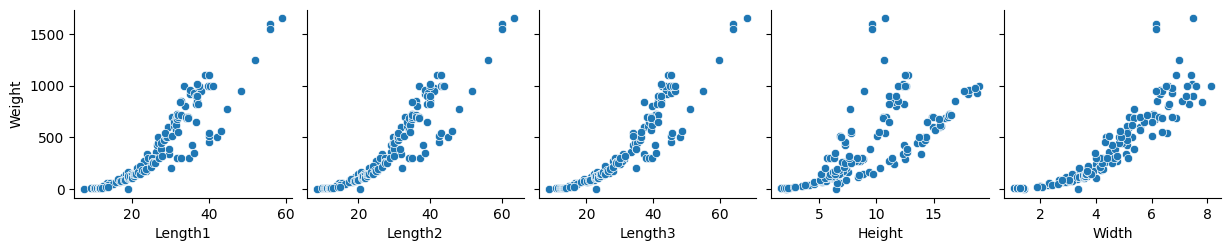

In [74]:
# Create a pair plot to see relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(df, x_vars=[ 'Length1', 'Length2', 'Length3', 'Height',
       'Width'], 
             y_vars=['Weight'])
plt.show()

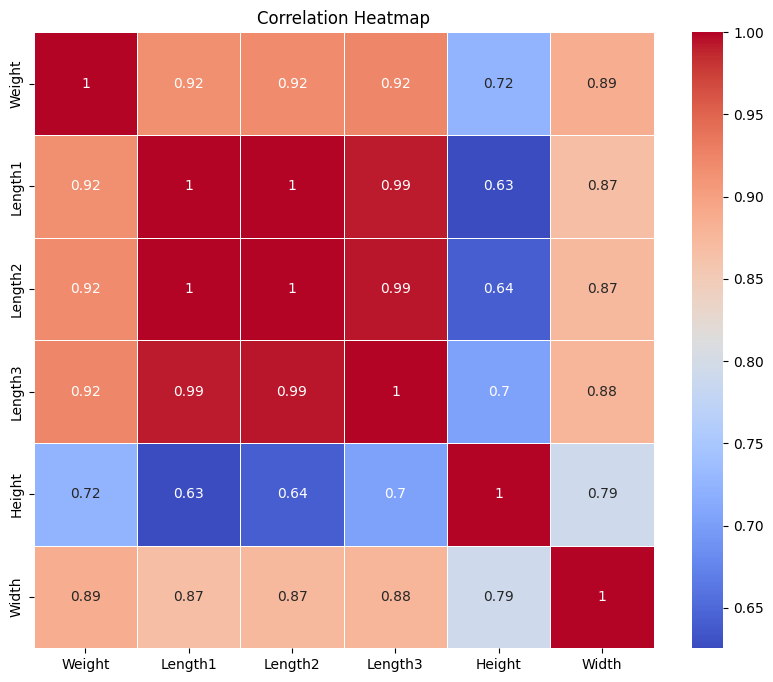

In [75]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# correlation_matrix = df[[ 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
#        'Width']].corr()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Single Variable**

In [76]:
# Extract feature and target
X_simple = df[['Height']].values
y = df['Weight'].values

In [77]:
# Split the data into training and testing sets
X_simple_train, X_simple_test, y_train, y_test = train_test_split(X_simple,y,test_size=0.2,random_state=42)

In [78]:
# Create and train the model
simple_model = LinearRegression()
simple_model.fit(X_simple_train,y_train)

LinearRegression()

In [79]:
# Make predictions
y_simple_train_pred = simple_model.predict(X_simple_train)
y_simple_test_pred = simple_model.predict(X_simple_test)

In [80]:
# Calculate metrics
simple_train_mse = mean_squared_error(y_train,y_simple_train_pred)
simple_test_mse = mean_squared_error(y_test,y_simple_test_pred)

print(f"Simple Linear Regression Results:")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"Coefficient (weight): {simple_model.coef_[0]:.6f}")
print(f"Training MSE: {simple_train_mse:.4f}")
print(f"Test MSE: {simple_test_mse:.4f}")



Simple Linear Regression Results:
Intercept: -150.0327
Coefficient (weight): 60.827644
Training MSE: 64227.1955
Test MSE: 45896.9478


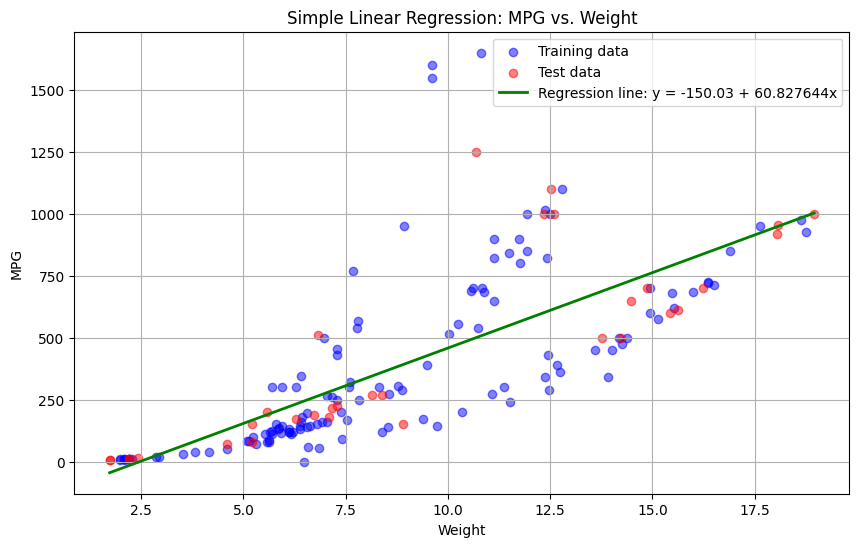

In [81]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_simple_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_simple_test, y_test, color='red', alpha=0.5, label='Test data')
# Plot the regression line
x_line = np.array([min(X_simple[:, 0]), max(X_simple[:, 0])]).reshape(-1, 1)
y_line = simple_model.predict(x_line)
plt.plot(x_line, y_line, 'g-', linewidth=2, label=f'Regression line: y = {simple_model.intercept_:.2f} + {simple_model.coef_[0]:.6f}x')

plt.title('Simple Linear Regression: MPG vs. Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()


**Multiple Variable**

In [82]:
# Extract features and target
X_multi = df[[ 'Length1', 'Length2', 'Length3', 'Height','Width']].values
y = df['Weight'].values

In [83]:
# Split the data
X_multi_train, X_multi_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [84]:
# Create and train the model
multi_model = LinearRegression()
multi_model.fit(X_multi_train, y_train)

LinearRegression()

In [85]:
# Make predictions
y_multi_train_pred = multi_model.predict(X_multi_train)
y_multi_test_pred = multi_model.predict(X_multi_test)


In [86]:
# Calculate metrics
multi_train_mse = mean_squared_error(y_train, y_multi_train_pred)
multi_test_mse = mean_squared_error(y_test, y_multi_test_pred)

print(f"Multiple Linear Regression Results:")
print(f"Intercept: {multi_model.intercept_:.4f}")
print("Coefficients:")
feature_names = ['Length1', 'Length2', 'Length3', 'Height','Width']
w = []
for name, coef in zip(feature_names, multi_model.coef_):
    print(f"  {name}: {coef:.6f}")
    w.append(coef)
    
print(f"Training MSE: {multi_train_mse:.4f}")
print(f"Test MSE: {multi_test_mse:.4f}")
# w0 + (w1 * length1) + (w2 * length2) + (w3 * length3) + (w4 * height) + (w5 * width)

Multiple Linear Regression Results:
Intercept: -515.3057
Coefficients:
  Length1: 43.535265
  Length2: 7.821796
  Length3: -25.256701
  Height: 23.228912
  Width: 27.066493
Training MSE: 14273.4542
Test MSE: 16763.8872


In [87]:
# Displaying the equation and predicted value
equation = f"Weight = {w[0]:.2f}*Length1 + {w[1]:.2f}*Length2 + {w[2]:.2f}*Length3 + {w[3]:.2f}*Height + {w[4]:.2f}*Width"

equation

'Weight = 43.54*Length1 + 7.82*Length2 + -25.26*Length3 + 23.23*Height + 27.07*Width'

****Featured Scaling****

In [88]:
# Create a scaler
scaler = StandardScaler()

In [89]:
# Fit the scaler on the training data and transform both training and test data
X_multi_train_scaled = scaler.fit_transform(X_multi_train)
X_multi_test_scaled = scaler.transform(X_multi_test)

In [90]:
# Create and train the model on scaled data
multi_model_scaled = LinearRegression()
multi_model_scaled.fit(X_multi_train_scaled, y_train)

LinearRegression()

In [91]:
# Make predictions
y_multi_train_pred_scaled = multi_model_scaled.predict(X_multi_train_scaled)
y_multi_test_pred_scaled = multi_model_scaled.predict(X_multi_test_scaled)

In [92]:
# Calculate metrics
multi_train_mse_scaled = mean_squared_error(y_train, y_multi_train_pred_scaled)
multi_test_mse_scaled = mean_squared_error(y_test, y_multi_test_pred_scaled)

print(f"Multiple Linear Regression Results (with Feature Scaling):")
print(f"Intercept: {multi_model_scaled.intercept_:.4f}")
print("Coefficients (scaled features):")
w = []
for name, coef in zip(feature_names, multi_model_scaled.coef_):
    print(f"  {name}: {coef:.6f}")
    w.append(coef)
print(f"Training MSE: {multi_train_mse_scaled:.4f}")
print(f"Test MSE: {multi_test_mse_scaled:.4f}")

# Displaying the equation and predicted value
equation = f"Weight = {w[0]:.2f}*Length1 + {w[1]:.2f}*Length2 + {w[2]:.2f}*Length3 + {w[3]:.2f}*Height + {w[4]:.2f}*Width"

equation

Multiple Linear Regression Results (with Feature Scaling):
Intercept: 386.7945
Coefficients (scaled features):
  Length1: 432.274726
  Length2: 83.013041
  Length3: -288.567976
  Height: 92.523216
  Width: 44.067409
Training MSE: 14273.4542
Test MSE: 16763.8872


'Weight = 432.27*Length1 + 83.01*Length2 + -288.57*Length3 + 92.52*Height + 44.07*Width'

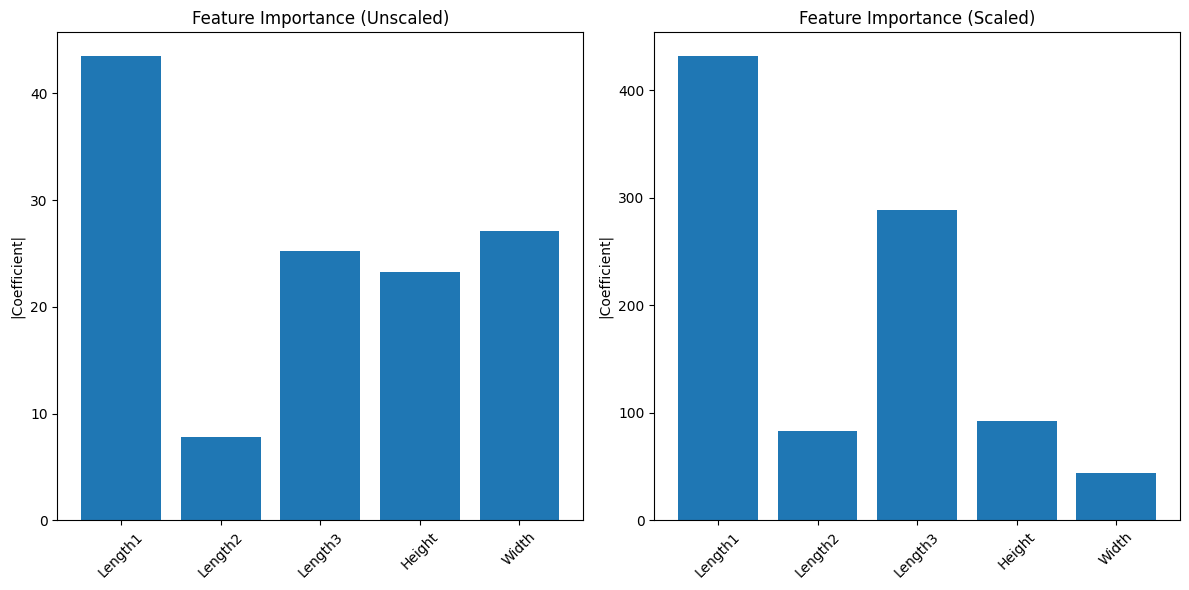

In [94]:
# Compare feature importance before and after scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(feature_names, np.abs(multi_model.coef_))
plt.title('Feature Importance (Unscaled)')
plt.xticks(rotation=45)
plt.ylabel('|Coefficient|')

plt.subplot(1, 2, 2)
plt.bar(feature_names, np.abs(multi_model_scaled.coef_))
plt.title('Feature Importance (Scaled)')
plt.xticks(rotation=45)
plt.ylabel('|Coefficient|')

plt.tight_layout()
plt.show()